<a href="https://colab.research.google.com/github/ShibuGitB/Project-4/blob/main/Social_Media_Usage_and_Emotional_Well_Being_ML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Social Media Usage and Emotional Well-Being***

***Imported necessary Packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

***Imported Dataset (Kaggle)***

In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning Project 2/social media usage dataset.csv")
dataset

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


In [3]:
dataset["Age"]=dataset["Age"].str.replace("Male","20")
dataset["Age"]=dataset["Age"].str.replace("Female","21")
dataset["Age"]=dataset["Age"].str.replace("Non-binary","22")
dataset["Age"]=dataset["Age"].str.replace(" işte mevcut veri kümesini 1000 satıra tamamlıyorum:","23")

In [4]:
x=['27','24','29','33','31','22','25','28','30','23','34','26','35','21','32']

for i in x :

  dataset["Gender"]=dataset["Gender"].str.replace(i,"Male")

# ***-- Exploratory Data Analysis (EDA)***

***Age of peoples using the platforms most***

<Axes: xlabel='Age', ylabel='count'>

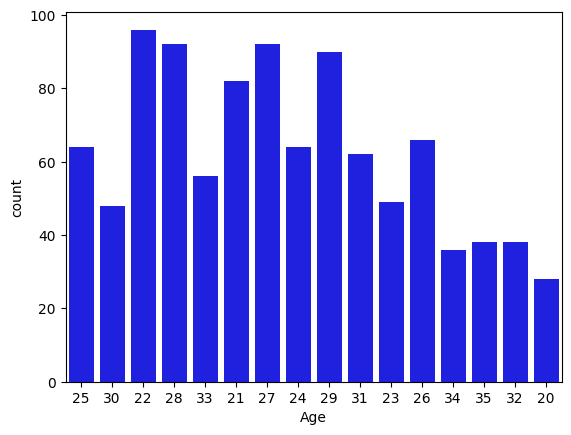

In [5]:
sns.countplot(x=dataset["Age"],data=dataset,color="blue")

In [6]:
dataset["Gender"].value_counts()

Gender
Male          408
Female        344
Non-binary    248
Name: count, dtype: int64

***Genders of Peoples & the how much they using the Platforms***

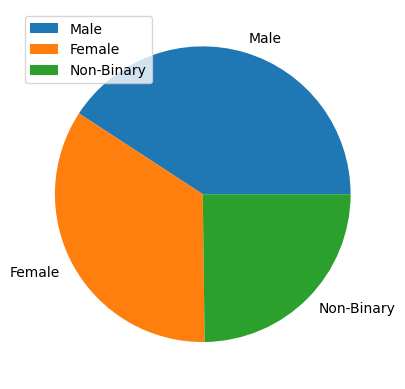

In [7]:
x=[408,344,248]
y=["Male","Female","Non-Binary"]
plt.pie(x,labels=y)
plt.legend()
plt.show()

***Platforms & how much they used by the peoples***

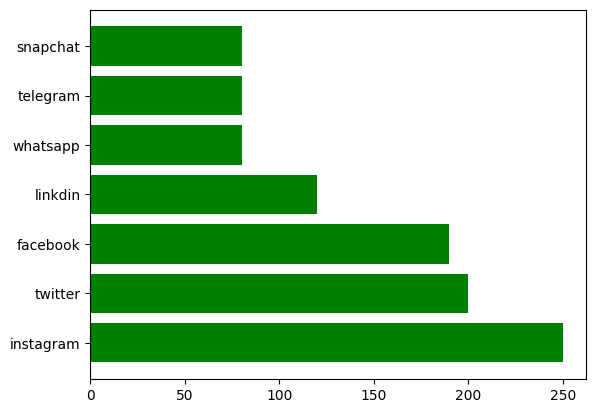

In [8]:
x=[250,200,190,120,80,80,80]
y=["instagram","twitter","facebook","linkdin","whatsapp","telegram","snapchat"]

plt.barh(y,x,color="g")
plt.show()

***Different Ages & the Genders of peoples in it using the Platforms***

<Axes: xlabel='Age', ylabel='count'>

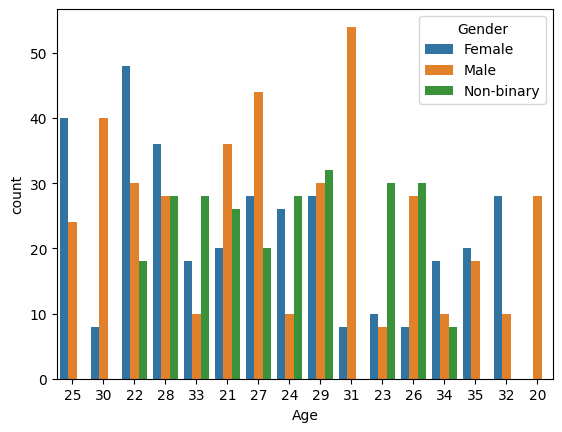

In [9]:
sns.countplot(x=dataset["Age"],data=dataset,hue="Gender")

***Different Ages & Platforms they Using***

<Axes: xlabel='Age', ylabel='count'>

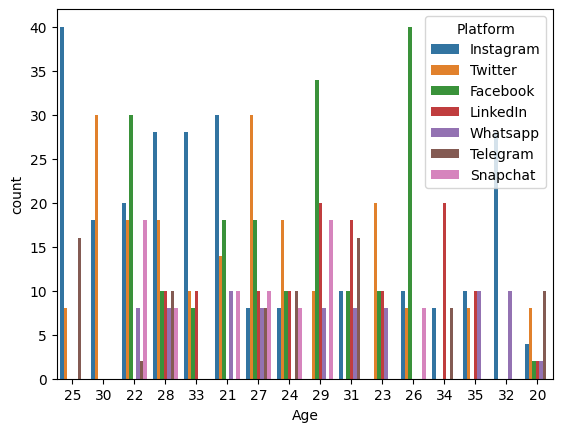

In [10]:
sns.countplot(x=dataset["Age"],data=dataset,hue="Platform")

***Range of each Platforms in the Genders of their customers***

<Axes: xlabel='Gender', ylabel='count'>

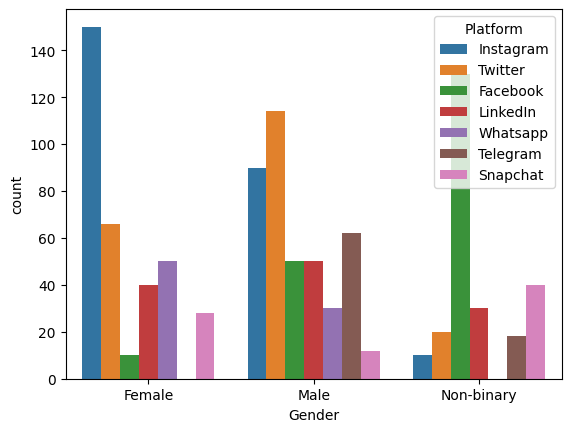

In [11]:
sns.countplot(x="Gender",data=dataset,hue="Platform")

***Each Emotions & how much it in the Peoples***

In [12]:
dataset["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    200
Neutral      200
Anxiety      170
Sadness      160
Boredom      140
Anger        130
Name: count, dtype: int64

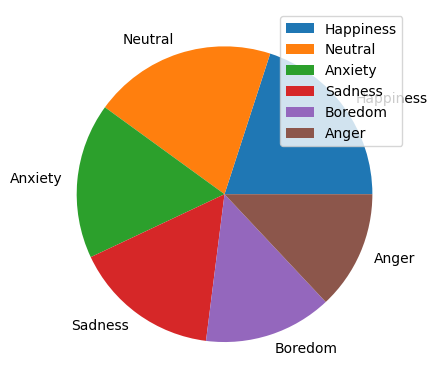

In [13]:
x=[200,200,170,160,140,130]
y=["Happiness","Neutral","Anxiety","Sadness","Boredom","Anger"]
plt.pie(x,labels=y)
plt.legend()
plt.show()

***Range of Ages in each Emotions***

<Axes: xlabel='Dominant_Emotion', ylabel='count'>

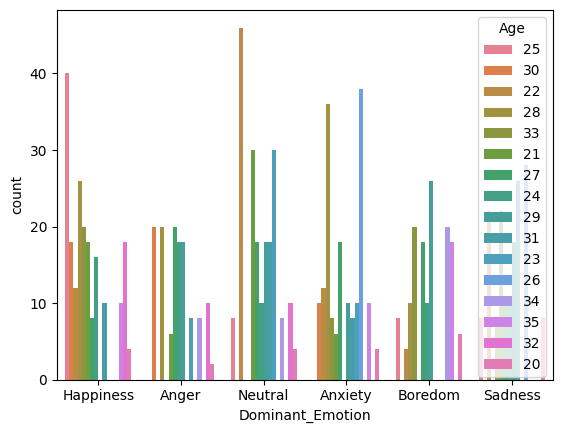

In [14]:
sns.countplot(x="Dominant_Emotion",data=dataset,hue="Age")

***Range of Emotions in each Genders***

<Axes: xlabel='Gender', ylabel='count'>

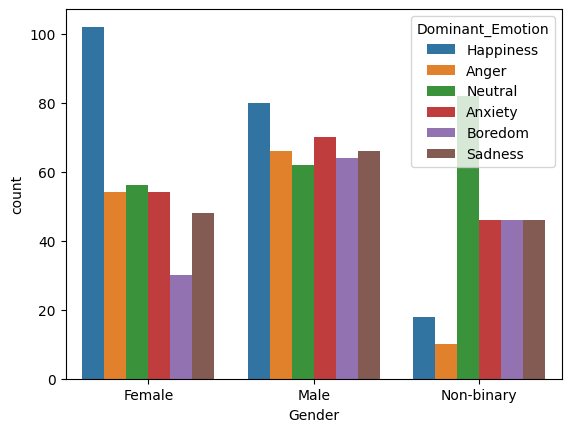

In [15]:
sns.countplot(x="Gender",data=dataset,hue="Dominant_Emotion")

***Range of Emotions in each Platforms***

<Axes: xlabel='Platform', ylabel='count'>

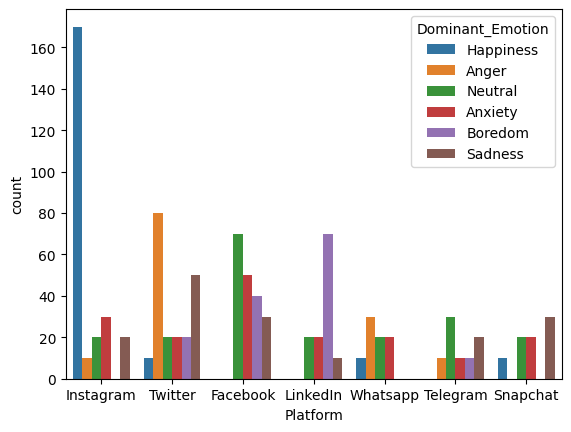

In [16]:
sns.countplot(x="Platform",data=dataset,hue="Dominant_Emotion")

# ***-- Machine Learning***

In [17]:
dataset

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


***Droping unwanted Columns***

In [18]:
dataset.drop(["User_ID"],axis=1,inplace=True)

***Checking is there any Missing Values or Not***

In [19]:
dataset.isna().sum()

Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

***Missing Value handling***

In [20]:
x=["Gender","Platform","Daily_Usage_Time (minutes)","Posts_Per_Day","Likes_Received_Per_Day","Comments_Received_Per_Day","Messages_Sent_Per_Day","Dominant_Emotion"]

for i in x :

  mode=dataset[i].mode()[0]
  dataset[i]=dataset[i].fillna(mode)

In [21]:
dataset.isna().sum()

Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

***Checking all the columns are Numeric or not***

In [22]:
dataset.dtypes

Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

***Converting some of the Object Columns to Numeric***

In [23]:
encoder=LabelEncoder()

x=["Age","Gender","Platform","Dominant_Emotion"]

for i in x :

  encoder.fit(dataset[i])
  dataset[i]=encoder.transform(dataset[i])

In [24]:
dataset.dtypes

Age                             int64
Gender                          int64
Platform                        int64
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion                int64
dtype: object

In [25]:
dataset

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,5,0,1,120.0,3.0,45.0,10.0,12.0,3
1,10,1,5,90.0,5.0,20.0,25.0,30.0,0
2,2,2,0,60.0,2.0,15.0,5.0,20.0,4
3,8,0,1,200.0,8.0,100.0,30.0,50.0,1
4,13,1,2,45.0,1.0,5.0,2.0,10.0,2
...,...,...,...,...,...,...,...,...,...
996,13,2,5,85.0,4.0,35.0,18.0,18.0,2
997,2,0,0,70.0,1.0,14.0,6.0,10.0,4
998,15,1,6,110.0,3.0,50.0,25.0,25.0,3
999,8,2,4,60.0,2.0,18.0,8.0,18.0,0


***Seperating Dataset into Input & Output***

In [26]:
input=dataset.iloc[:,0:8]
input

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,5,0,1,120.0,3.0,45.0,10.0,12.0
1,10,1,5,90.0,5.0,20.0,25.0,30.0
2,2,2,0,60.0,2.0,15.0,5.0,20.0
3,8,0,1,200.0,8.0,100.0,30.0,50.0
4,13,1,2,45.0,1.0,5.0,2.0,10.0
...,...,...,...,...,...,...,...,...
996,13,2,5,85.0,4.0,35.0,18.0,18.0
997,2,0,0,70.0,1.0,14.0,6.0,10.0
998,15,1,6,110.0,3.0,50.0,25.0,25.0
999,8,2,4,60.0,2.0,18.0,8.0,18.0


In [27]:
output=dataset.iloc[:,8]
output

0       3
1       0
2       4
3       1
4       2
       ..
996     2
997     4
998     3
999     0
1000    4
Name: Dominant_Emotion, Length: 1001, dtype: int64

***Scaling Input***

In [28]:
scaler=MinMaxScaler()
scaler.fit(input)
input2=scaler.transform(input)

***Taking Input & Output for Training & Testing***

In [29]:
x_train,x_test,y_train,y_test=train_test_split(input2,output,test_size=0.3,random_state=1)

***By applying Different Algorithms creating different Models & checking their Accuracys to pick the Best one***

In [30]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [31]:
print (accuracy_score(y_test,y_pred))

0.9601328903654485


In [32]:
model2=SVC(kernel="linear")
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [33]:
print (accuracy_score(y_test,y_pred2))

0.5548172757475083


In [34]:
model3=GaussianNB()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [35]:
print (accuracy_score(y_test,y_pred3))

0.4584717607973422


In [36]:
model4=MultinomialNB()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [37]:
print (accuracy_score(y_test,y_pred4))

0.42857142857142855


In [38]:
model5=DecisionTreeClassifier(criterion="entropy")
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [39]:
print (accuracy_score(y_test,y_pred5))

0.946843853820598


In [40]:
model6=RandomForestClassifier(criterion="entropy",n_estimators=300,random_state=1)
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)

In [41]:
print (accuracy_score(y_test,y_pred6))

0.9800664451827242


In [42]:
model7=AdaBoostClassifier(random_state=1)
model7.fit(x_train,y_train)
y_pred7=model7.predict(x_test)

In [43]:
print (accuracy_score(y_test,y_pred7))

0.4684385382059801


In [44]:
model8=XGBClassifier(random_state=1)
model8.fit(x_train,y_train)
y_pred8=model8.predict(x_test)

In [45]:
print (accuracy_score(y_test,y_pred8))

0.9833887043189369


In [46]:
params={"n_neighbors":[3,5,7,9],"algorithm":["auto","ball_tree","kd_tree","brute"],"weights":["uniform","distance"]}
tuner=GridSearchCV(model,params,cv=5,scoring="accuracy")
tuner.fit(x_train,y_train)
print (tuner.best_params_)

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [47]:
model9=KNeighborsClassifier(n_neighbors=7,algorithm="auto",weights="distance")
model9.fit(x_train,y_train)
y_pred9=model.predict(x_test)

In [48]:
print (accuracy_score(y_test,y_pred9)*100)

96.01328903654485


***Got the Best Model at K Nearest Neighbors by Hyper Parameter Tuning -- 98.338 %***

***Choosed & Locked the Model with that Accuracy***

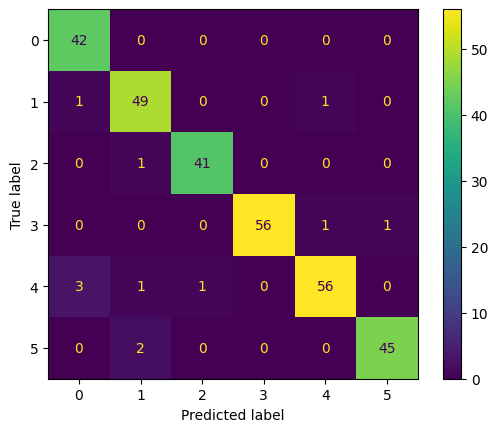

In [49]:
print (ConfusionMatrixDisplay.from_predictions(y_test,y_pred9))

In [50]:
print (classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        42
           1       0.92      0.96      0.94        51
           2       0.98      0.98      0.98        42
           3       1.00      0.97      0.98        58
           4       0.97      0.92      0.94        61
           5       0.98      0.96      0.97        47

    accuracy                           0.96       301
   macro avg       0.96      0.96      0.96       301
weighted avg       0.96      0.96      0.96       301



***Done the Prediction with that Model***

In [51]:
prediction=model9.predict([[8,0,1,200.0,8.0,100.0,30.0,50.0]])
prediction2=encoder.inverse_transform(prediction)
print (prediction2)

['Anxiety']


***Took the Model,Scaler,Label Encoder objects for the Deploy Representation***

In [52]:
import joblib

joblib.dump(model9,"Emotion detection model")
joblib.dump(scaler,"Emotion detection scaler")
joblib.dump(encoder,"Emotion detection encoder")

['Emotion detection encoder']